In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [36]:
kernels = np.load('kernels.npy')
weights = np.load('weights_small.npy')
proj = np.load('Bone_slice.npy')

In [37]:
original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])
new_energies_keV = np.linspace(0.001,1,50)*1000

In [38]:
new_energies_keV

array([   1.        ,   21.3877551 ,   41.7755102 ,   62.16326531,
         82.55102041,  102.93877551,  123.32653061,  143.71428571,
        164.10204082,  184.48979592,  204.87755102,  225.26530612,
        245.65306122,  266.04081633,  286.42857143,  306.81632653,
        327.20408163,  347.59183673,  367.97959184,  388.36734694,
        408.75510204,  429.14285714,  449.53061224,  469.91836735,
        490.30612245,  510.69387755,  531.08163265,  551.46938776,
        571.85714286,  592.24489796,  612.63265306,  633.02040816,
        653.40816327,  673.79591837,  694.18367347,  714.57142857,
        734.95918367,  755.34693878,  775.73469388,  796.12244898,
        816.51020408,  836.89795918,  857.28571429,  877.67346939,
        898.06122449,  918.44897959,  938.83673469,  959.2244898 ,
        979.6122449 , 1000.        ])

In [39]:
indeces = []

summed_image = np.zeros([proj.shape[0],proj.shape[1],len(original_energies_keV)])

for ii in range(len(new_energies_keV)):
    
    index = np.argmin(abs(original_energies_keV - new_energies_keV[ii]))
    
    print(index)
    
    summed_image[:,:,index] += proj[:,:,ii+1]
    
summed_image[:,:,index] += proj[:,:,ii+2]
summed_image[:,:,index] += proj[:,:,ii+3]

0
0
1
3
5
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
12
12
12


<IPython.core.display.Javascript object>


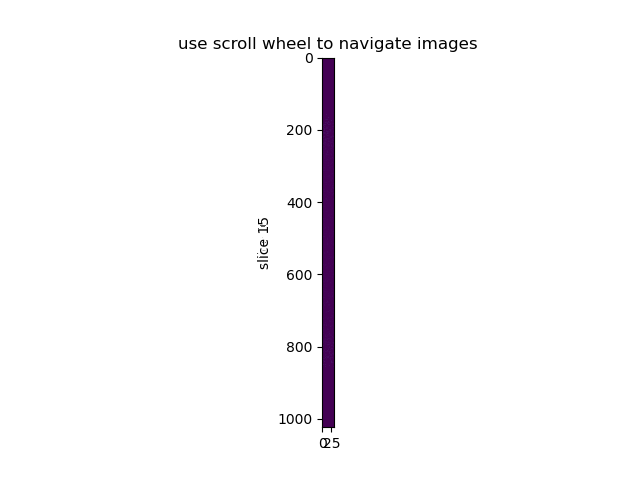

In [40]:

class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = summed_image

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [41]:
# kernel_norm = kernels.transpose([2,1,0])@weights
weighted_image = summed_image[:,:,1:]@weights

# new_image = fftconvolve(weighted_image,kernel_norm, mode = 'same')


<IPython.core.display.Javascript object>


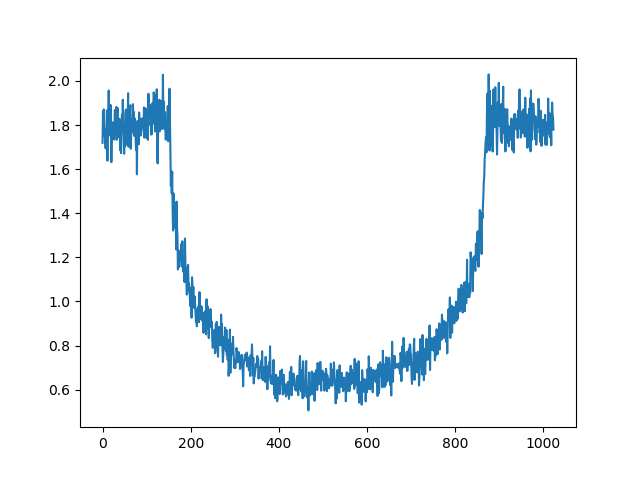

In [42]:
plt.figure()
plt.plot(np.mean(weighted_image,1))

<IPython.core.display.Javascript object>


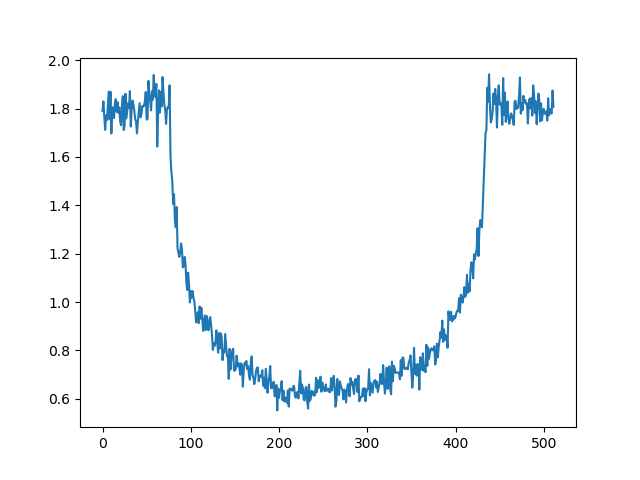

In [44]:
slices = np.mean(weighted_image,1)
slices_512 = (slices[::2] + slices[1::2])/2

plt.figure()
plt.plot(slices_512)

In [47]:
inds = [ii < 70 or ii > 440 for ii in range(slices_512.shape[0])]

edges = slices_512[inds]

fit = np.polyfit([i for i, x in enumerate(inds) if x],edges,6)

symmetric_fit = np.concatenate((np.polyval(fit,np.arange(0,256)),np.polyval(fit,np.arange(0,256))[-1::-1]))

In [48]:
log_primary_projections = -np.log(slices_512/symmetric_fit)

<IPython.core.display.Javascript object>


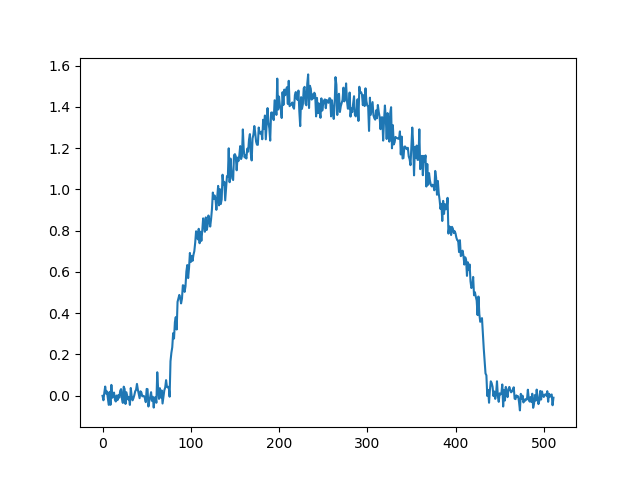

In [49]:
plt.figure()
plt.plot(log_primary_projections)